<div style="text-align: right">Paul Novaes<br>June 2018</div> 

# Classic Fractals

This notebook shows how to render the following fractals:
* Koch snowflake
* Sierpinski triangle
* Mandelbrot set

## Preparation

The following code allows to draw the fractals as images instead of plots in a graph:

In [1]:
from matplotlib import pyplot

def init_graphics():
    pyplot.axes().set_aspect('equal')
    pyplot.axis('off')

This utility function will be useful for the Koch snowflake and the Sierpinski triangle:

In [2]:
import math

# Given a segment [P1, P2] returns a point P3 such that [P1, P2, P3] is an
# equilateral triangle (counter-clockwise).
def complete_triangle(P1, P2):
    [x1, y1] = P1
    [x2, y2] = P2
    return [(x1 + x2) / 2 - (y2 - y1) * math.sqrt(3) / 2,
            (y1 + y2) / 2 + (x2 - x1) * math.sqrt(3) / 2]

## Koch snowflake

The Koch snowflake is constructed by starting with an equilateral triangle and then replacing each line segment of the triangle by 4 connected segments \_/\\\_ of same length.

This process is then iterated on each new line segment.

If we iterate $n$ times we obtain a curve of length $(4/3)^n$ times the perimeter of the original triangle. This leads to a fractal, finitely bounded, but of infinite length. 

In [3]:
def koch_line(P1, P2, depth):
    [x1, y1] = P1
    [x2, y2] = P2
    if depth == 0:
        pyplot.plot([x1, x2], [y1, y2], 'black')
    else:
        # From P1, P2 consider the 4 segments _/\_ [P1,A], [A,B], [B,C] 
        # and [C,P2] and draw each corresponding Koch line recursively.
        A = [x1 + (x2 - x1) / 3, y1 + (y2 - y1) / 3]
        C = [x1 + 2 * (x2 - x1) / 3, y1 + 2 * (y2 - y1) / 3]
        B = complete_triangle(A, C)
        koch_line(P1, A, depth - 1)
        koch_line(A, B, depth - 1)
        koch_line(B, C, depth - 1)
        koch_line(C, P2, depth - 1)
        
def koch_snowflake(A, B, C, depth):
    koch_line(A, B, depth)
    koch_line(B, C, depth)
    koch_line(C, A, depth)

Let's make things concrete:

In [4]:
def sample_koch_snowflake(depth):
    init_graphics()
    A = [0, 0]
    B = [1, 0]
    C = complete_triangle(B, A)
    koch_snowflake(A, B, C, depth)
    
def sample_koch_line(depth):
    init_graphics()
    koch_line([0, 0], [1, 0], depth)
    

Iterating 4 times, we get:

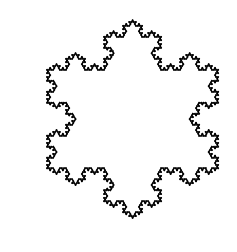

In [5]:
sample_koch_snowflake(4)

Iterations on a given line segment:

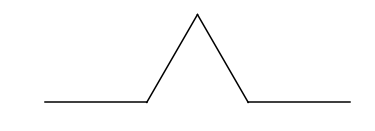

In [6]:
sample_koch_line(1)

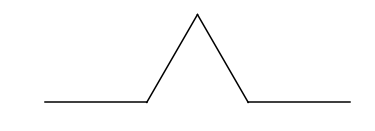

In [7]:
sample_koch_line(1)

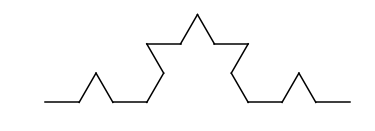

In [8]:
sample_koch_line(2)

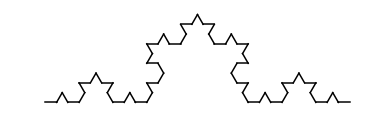

In [9]:
sample_koch_line(3)

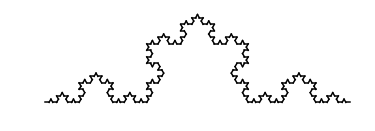

In [10]:
sample_koch_line(4)

## Sierpinski Triangle

We start with a filled equilateral triangle. 

We can view this triangle as made of 4 smaller equilateral triangles. We remove the inner one.

This process is then iterated on the remaining smaller triangles.

In [11]:
def sierpinski(A, B, C, depth):
    if depth == 0:
        return
    [xA, yA] = A
    [xB, yB] = B
    [xC, yC] = C
    # Remove the inner triangle [AA, BB, CC].
    AA = [(xB + xC)/2, (yB + yC)/2]
    BB = [(xA + xC)/2, (yA + yC)/2]    
    CC = [(xA + xB)/2, (yA + yB)/2]
    pyplot.fill([AA[0], BB[0], CC[0]], [AA[1], BB[1], CC[1]], "white")
    # Recurse, on the triangles left.
    sierpinski(A, CC, BB, depth - 1)
    sierpinski(CC, B, AA, depth - 1)
    sierpinski(BB, AA, C, depth - 1)
    
def sample_sierpinski(depth):
    init_graphics()
    A = [0, 0]
    B = [1, 0]
    C = complete_triangle(A, B)
    pyplot.fill([A[0], B[0], C[0]], [A[1], B[1], C[1]], "black")
    sierpinski(A, B, C, depth)

Let's run a few iterations:

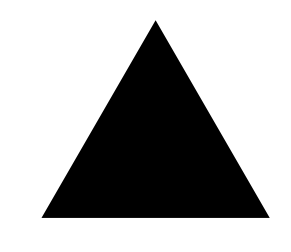

In [12]:
sample_sierpinski(0)

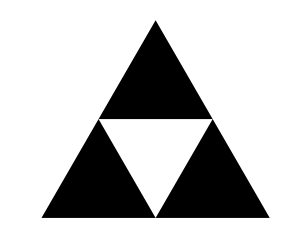

In [13]:
sample_sierpinski(1)

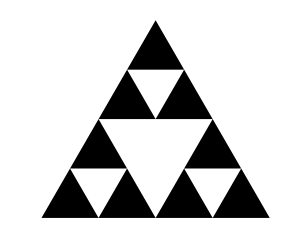

In [14]:
sample_sierpinski(2)

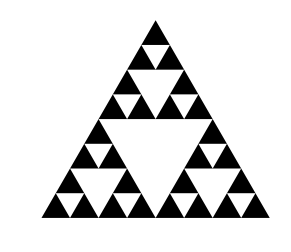

In [15]:
sample_sierpinski(3)

Jumping to depth 7:

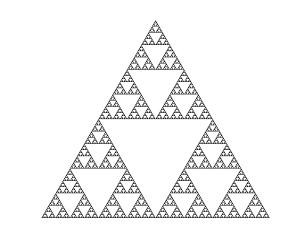

In [16]:
sample_sierpinski(7)

## Mandelbrot Set

This is the most famous fractal of all. It is defined as the set of complex numbers $c$ such that the sequence $0, c, c + c^2, (c + c^2)^2 + c, ((c + c^2)^2 + c)^2 + c, \ldots$ is bounded.

In [17]:
import numpy

# Returns true if the iteration is (probably) bounded.
def is_sequence_bounded(c):
    z = 0
    for i in range(100):
        z = z * z + c
        if numpy.absolute(z) > 2:
            return False
    return True

def mandelbrot(x0, x1, y0, y1):
    init_graphics()
    delta = min((x1 - x0) / 100, (y1 - y0) / 100)
    for x in numpy.arange(x0 , x1, delta):
        for y in numpy.arange(y0, y1, delta):
            if is_sequence_bounded(x + y*1j):
                pyplot.fill([x, x + delta, x + delta, x], 
                            [y, y, y + delta, y + delta], 'black')

Let's display the full set and then let's zoom in. 

Note that because of limitations in the graphics and in the computations, the set appears to be disconnected. With more precision, it would appear connected, the way it is.

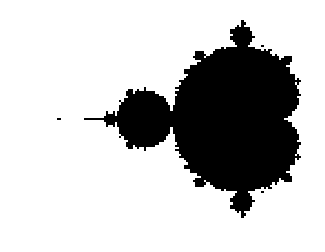

In [18]:
mandelbrot(-2, 1, -1, 1)

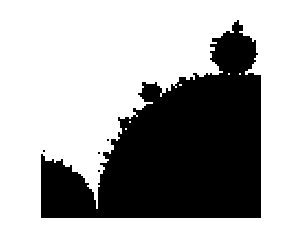

In [19]:
mandelbrot(-1, 0, 0, 1)

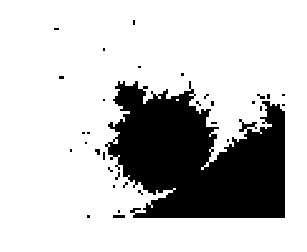

In [20]:
mandelbrot(-0.66, -0.4, 0.5, 0.72)

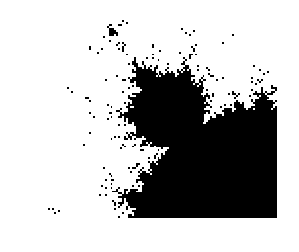

In [21]:
mandelbrot(-0.57, -0.50, 0.57, 0.63)